In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Interactive Exoplanet plots with Bokeh
This is a demonstration of creating interactive plots using [`bokeh`](http://bokeh.pydata.org/en/latest/docs/gallery.html) library. A summary and tutorial is also [here](http://chdoig.github.io/pyladiesatx-bokeh-tutorial/#/1). 

## Fetching data

In [1]:
#for Pyton 2.7
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import urllib2

url = 'http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets'
response = urllib2.urlopen(url)
html = response.read()

outpath = 'confirmed_planets_{}.csv'.format(time.strftime("%Y%m%d")) #include date of download

print("retrieving URL: {}".format(url))

with open(outpath,'wb') as f:
     f.write(html)
print("created file: {}".format(outpath))

retrieving URL: http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets
created file: confirmed_planets_20161227.csv


## Importing as pandas dataframe (df)

In [2]:
import pandas as pd
df = pd.read_csv(outpath)
df.head()

,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,pl_orbsmax,...,st_massblend,st_massn,st_rad,st_raderr1,st_raderr2,st_radlim,st_radblend,st_radn,pl_nnotes,rowupdate
0,HD 10180,f,Radial Velocity,6,122.744,0.232,-0.232,0.0,2,0.4929,...,0.0,4,1.11,0.04,-0.04,0.0,0.0,2,0,2015-06-25
1,HD 10180,h,Radial Velocity,6,2205.000,105.900,-105.900,0.0,2,3.3810,...,0.0,4,1.11,0.04,-0.04,0.0,0.0,2,0,2015-06-25
2,HD 10442,b,Radial Velocity,1,1043.000,9.000,-9.000,0.0,1,2.3350,...,0.0,1,NaN,NaN,NaN,NaN,0.0,0,0,2014-12-03
3,HD 10697,b,Radial Velocity,1,1075.200,1.500,-1.500,0.0,2,2.1310,...,0.0,5,NaN,NaN,NaN,NaN,0.0,2,0,2014-05-14
4,HD 11506,b,Radial Velocity,2,1627.500,5.900,-5.900,0.0,3,2.7080,...,0.0,4,1.33,0.05,-0.05,0.0,0.0,3,0,2014-12-03


## Static plot

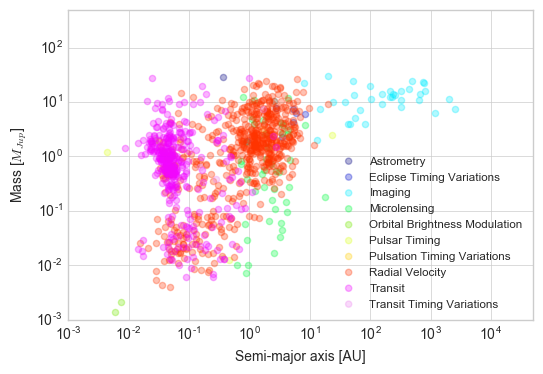

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots() #figsize=(10,8)
for name, group in df.groupby('pl_discmethod'):
    group.plot(x='pl_orbsmax', y='pl_bmassj', kind='scatter', alpha=0.3, label=str(name), ax=ax)

plt.xscale('log')
plt.yscale('log')
plt.ylabel('Mass [$M_{Jup}$]')
plt.xlabel('Semi-major axis [AU]')
plt.ylabel('Mass [$M_{Jup}$]')
plt.ylabel('Mass [$M_{Jup}$]')
plt.xlim([1e-3, 5e4])
plt.ylim([1e-3, 5e2])

#just make a colormap
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])

ax.legend(fontsize='small', loc=4)
plt.show()

## Group by detection method

In [3]:
idx1 = df['pl_discmethod'] == 'Transit'
df_transit = df[idx1]

idx2 = df['pl_discmethod'] == 'Radial Velocity'
df_RV = df[idx2]

idx3 = df['pl_discmethod'] == 'Imaging'
df_DI = df[idx3]

idx4 = df['pl_discmethod'] == 'Microlensing'
df_ML = df[idx4]

idx5 = df['pl_discmethod'] == 'Astrometry'
df_A = df[idx5]

idx6 = df['pl_discmethod'] == 'Transit Timing Variations'
df_TTV = df[idx6]

idx7 = df['pl_discmethod'] == 'Eclipse Timing Variations'
df_ETV = df[idx7]

idx8 = df['pl_discmethod'] == 'Pulsar Timing'
df_PT = df[idx8]

idx9 = df['pl_discmethod'] == 'Pulsation Timing Variations'
df_PTV = df[idx9]

idx10 = df['pl_discmethod'] == 'Orbital Brightness Modulation'
df_OBM = df[idx10]

## Using `bokeh`

In [4]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

### Linked plots

In [5]:
from bokeh.models import ColumnDataSource

source = ColumnDataSource(df_transit)
##interactive tools can be specified in the plot_options
TOOLS = "box_select, pan, wheel_zoom, lasso_select, reset, save, help"
plot_options = dict(width=400, plot_height=400, tools=TOOLS, y_axis_type="log", x_axis_type="log")

from bokeh.plotting import figure
## create a new plot
#specify here xylims + common plot options
s1 = figure(y_range=[1e-3, 1e2], x_range=[1e-3, 1e2], x_axis_label = "Semi-major axis [AU]", y_axis_label = "Planet Mass [M_Jup]", **plot_options) 
s1.scatter('pl_orbsmax', 'pl_bmassj', size=4, color="navy", source=source)

## create a new plot and share both ranges
s2 = figure(x_range=s1.x_range, y_range=s1.y_range, x_axis_label = "Semi-major axis [AU]", y_axis_label = "Planet Radius [R_Jup]", **plot_options)
s2.scatter('pl_orbsmax', 'pl_radj', size=4, color="firebrick", source=source)

from bokeh.layouts import gridplot
p = gridplot([[s1, s2]])

from bokeh.io import show
## show the results
show(p)

#can be saved as html
#output_file("logscatter.html", title="log axis scatter example")

##
#legend="sin(x)"
#p.legend.location = "bottom_left"

### With hover tooltips

In [6]:
from bokeh.layouts import gridplot
from bokeh.plotting import figure

from bokeh.models import ColumnDataSource

name = [str(i+' '+j) for i,j in zip (df_transit['pl_hostname'].values, df_transit['pl_letter'].values)]
#source = ColumnDataSource(df_transit)
## df columns can take new names if specified as below
source = ColumnDataSource(data={
     'x' : df_transit['pl_orbsmax'].values,
     'y' : df_transit['pl_radj'].values,
     'name' : name
 })

from bokeh.models import HoverTool

hover = HoverTool(
        tooltips=[
            #("df_transit.index", "$index"),
            ("(a,R)", "(@x, @y)"),
            ("name", "@name"),
        ]
    )
##interactive tools can be specified in the plot_options
TOOLS = "box_zoom,box_select, pan, wheel_zoom, lasso_select, reset, save, help"
plot_options = dict(width=400, plot_height=400, tools=[hover,TOOLS], y_axis_type="log", x_axis_type="log")

## create a new plot
#specify here xylims + common plot options
p = figure(y_range=[1e-2, 1e1], x_range=[1e-3, 1e1], x_axis_label = "Semi-major axis [AU]", y_axis_label = "Planet Radius [R_Jup]", **plot_options) 
p.scatter('x', 'y', size=4, color="navy", source=source)

## show the results
show(p)

#can be saved as html
#output_file("logscatter.html", title="log axis scatter example")run

In [12]:
from bokeh.io import output_file

output_file("exoplanets")